In [2]:
import polars as pl
import os
# from utils.helpers import save_dict_to_json


# Data Exploration

In [15]:
# Read multiple parquet files into one DataFrame
df = pl.scan_parquet("data/anomaly_results_*.parquet").collect()
print(df)

shape: (4_273_166, 30)
┌─────────┬───────┬────────────┬────────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ row_nr  ┆ label ┆ timestamp  ┆ date       ┆ … ┆ e_chars_le ┆ e_lines_le ┆ e_event_id ┆ pred_ano_ │
│ ---     ┆ ---   ┆ ---        ┆ ---        ┆   ┆ n          ┆ n          ┆ _len       ┆ proba     │
│ u32     ┆ str   ┆ str        ┆ str        ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│         ┆       ┆            ┆            ┆   ┆ u32        ┆ u32        ┆ i32        ┆ f64       │
╞═════════╪═══════╪════════════╪════════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 2852490 ┆ -     ┆ 1122578285 ┆ 2005.07.28 ┆ … ┆ 20         ┆ 0          ┆ 1          ┆ 0.794352  │
│ 516666  ┆ -     ┆ 1118768280 ┆ 2005.06.14 ┆ … ┆ 39         ┆ 0          ┆ 1          ┆ 0.818675  │
│ 1293628 ┆ -     ┆ 1120259722 ┆ 2005.07.01 ┆ … ┆ 42         ┆ 0          ┆ 1          ┆ 0.802039  │
│ 3542227 ┆ -     ┆ 1128433832 ┆ 2005.10.04 ┆ … ┆ 88         ┆ 0    

In [5]:
# count unique values of type column

df.get_column("type").value_counts()

type,count
str,u32
"""interrupts,""",4
"""(5438708)""",1
"""for""",4
"""(4211594)""",1
"""RAS""",4179158
"""NULL""",93720
"""KERNEL""",278


In [6]:
df_sorted = df.sort('row_nr')
print(df_sorted)

shape: (4_273_166, 30)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ row_nr  ┆ label    ┆ timestamp  ┆ date       ┆ … ┆ e_chars_l ┆ e_lines_l ┆ e_event_i ┆ pred_ano_ │
│ ---     ┆ ---      ┆ ---        ┆ ---        ┆   ┆ en        ┆ en        ┆ d_len     ┆ proba     │
│ u32     ┆ str      ┆ str        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆            ┆            ┆   ┆ u32       ┆ u32       ┆ i32       ┆ f64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ -        ┆ 1117838570 ┆ 2005.06.03 ┆ … ┆ 40        ┆ 0         ┆ 1         ┆ 0.804633  │
│ 1       ┆ -        ┆ 1117838570 ┆ 2005.06.03 ┆ … ┆ 40        ┆ 0         ┆ 1         ┆ 0.804633  │
│ 2       ┆ -        ┆ 1117838570 ┆ 2005.06.03 ┆ … ┆ 40        ┆ 0         ┆ 1         ┆ 0.804633  │
│ 3       ┆ -        ┆ 1117838570 ┆ 2005.06.03 ┆ … ┆ 40        ┆ 0  

In [16]:
# take a sample of the dataframe: dates between 2020-01-01 and 2020-01-31
df = df.with_columns(pl.col("date").str.to_date())
df_sample = df.filter(pl.col("date").is_between(pl.lit("2005-06-22").str.to_date(), pl.lit("2005-07-31").str.to_date()))
df_sample

row_nr,label,timestamp,date,node,time,noderepeat,type,component,level,m_message,normal,m_timestamp,anomaly,e_message_normalized,e_event_spell_id,e_template_spell,e_words,e_words_len,e_trigrams,e_trigrams_len,e_event_drain_id,e_event_tip_id,e_event_pliplom_id,e_event_iplom_id,e_event_brain_id,e_chars_len,e_lines_len,e_event_id_len,pred_ano_proba
u32,str,str,date,str,str,str,str,str,str,str,bool,datetime[μs],bool,str,str,str,list[str],u32,list[str],u32,str,str,str,str,str,u32,u32,i32,f64
2852490,"""-""","""1122578285""",2005-07-28,"""R20-M1-N4-C:J14-U11""","""2005-07-28-12.18.05.090882""","""R20-M1-N4-C:J14-U11""","""RAS""","""KERNEL""","""INFO""","""generating core.1628""",true,2005-07-28 19:18:05,false,"""generating core.<NUM>""","""fe1e2f9d""","""generating core.<NUM>""","[""generating"", ""core.1628""]",2,"[""gen"", ""era"", … ""628""]",18,"""e3""","""e5""","""e35e1""","""fe1e2f9d""","""E43""",20,0,1,0.794352
1293628,"""-""","""1120259722""",2005-07-01,"""R26-M0-NA-C:J08-U11""","""2005-07-01-16.15.22.852060""","""R26-M0-NA-C:J08-U11""","""RAS""","""KERNEL""","""INFO""","""1146800 double-hummer alignmen…",true,2005-07-01 23:15:22,false,"""<NUM> double-hummer alignment …","""d461cf20""","""<NUM> * alignment exceptions""","[""1146800"", ""double-hummer"", … ""exceptions""]",4,"[""114"", ""680"", … ""ion""]",40,"""e11""","""e109""","""e24e1""","""bf82a205""","""E170""",42,0,1,0.802039
2735411,"""-""","""1122403354""",2005-07-26,"""R06-M0-N2-C:J05-U11""","""2005-07-26-11.42.34.072943""","""R06-M0-N2-C:J05-U11""","""RAS""","""KERNEL""","""INFO""","""generating core.319""",true,2005-07-26 18:42:34,false,"""generating core.<NUM>""","""fe1e2f9d""","""generating core.<NUM>""","[""generating"", ""core.319""]",2,"[""gen"", ""era"", … ""e.3""]",17,"""e3""","""e5""","""e35e1""","""fe1e2f9d""","""E43""",19,0,1,0.794352
1821974,"""-""","""1120953238""",2005-07-09,"""R27-M0-N0-C:J11-U11""","""2005-07-09-16.53.58.331368""","""R27-M0-N0-C:J11-U11""","""RAS""","""KERNEL""","""INFO""","""generating core.12157""",true,2005-07-09 23:53:58,false,"""generating core.<NUM>""","""fe1e2f9d""","""generating core.<NUM>""","[""generating"", ""core.12157""]",2,"[""gen"", ""era"", … ""215""]",19,"""e3""","""e5""","""e35e1""","""fe1e2f9d""","""E43""",21,0,1,0.794352
1625708,"""-""","""1120929130""",2005-07-09,"""R10-M1-N5-C:J06-U11""","""2005-07-09-10.12.10.130336""","""R10-M1-N5-C:J06-U11""","""RAS""","""KERNEL""","""INFO""","""generating core.9002""",true,2005-07-09 17:12:10,false,"""generating core.<NUM>""","""fe1e2f9d""","""generating core.<NUM>""","[""generating"", ""core.9002""]",2,"[""gen"", ""era"", … ""002""]",18,"""e3""","""e5""","""e35e1""","""fe1e2f9d""","""E43""",20,0,1,0.794352
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1897825,"""-""","""1120968540""",2005-07-09,"""R35-M1-N0-C:J16-U01""","""2005-07-09-21.09.00.346744""","""R35-M1-N0-C:J16-U01""","""RAS""","""KERNEL""","""INFO""","""generating core.27844""",true,2005-07-10 04:09:00,false,"""generating core.<NUM>""","""fe1e2f9d""","""generating core.<NUM>""","[""generating"", ""core.27844""]",2,"[""gen"", ""era"", … ""784""]",19,"""e3""","""e5""","""e35e1""","""fe1e2f9d""","""E43""",21,0,1,0.794352
1044760,"""-""","""1119803339""",2005-06-26,"""R03-M0-N6-C:J02-U11""","""2005-06-26-09.28.59.970412""","""R03-M0-N6-C:J02-U11""","""RAS""","""KERNEL""","""INFO""","""floating point operation......…",true,2005-06-26 16:28:59,false,"""floating point operation......…","""5b81fd62""","""floating point *""","[""floating"", ""point"", ""operation....................0""]",3,"[""flo"", ""ati"", … ""...""]",43,"""e164""","""e75""","""e7e21""","""a12118f5""","""E483""",45,0,1,0.798912
1732182,"""-""","""1120935622""",2005-07-09,"""R04-M1-N8-C:J02-U01""","""2005-07-09-12.00.22.765602""","""R04-M1-N8-C:J02-U01""","""RAS""","""KERNEL""","""INFO""","""generating core.32007""",true,2005-07-09 19:00:22,false,"""generating core.<NUM>""","""fe1e2f9d""","""generating core.<NUM>""","[""generating"", ""cor

In [9]:
df_sample.write_parquet("data/filtered_data_one_month.parquet")


In [ ]:
#list columns
print(df.columns)

['row_nr', 'label', 'timestamp', 'date', 'node', 'time', 'noderepeat', 'type', 'component', 'level', 'm_message', 'normal', 'm_timestamp', 'anomaly', 'e_message_normalized', 'e_event_spell_id', 'e_template_spell', 'e_words', 'e_words_len', 'e_trigrams', 'e_trigrams_len', 'e_event_drain_id', 'e_event_tip_id', 'e_event_pliplom_id', 'e_event_iplom_id', 'e_event_brain_id', 'e_chars_len', 'e_lines_len', 'e_event_id_len', 'pred_ano_proba']


In [ ]:
df_reduced = df_sorted[["row_nr", "timestamp","time","date","anomaly", "m_message", "e_message_normalized"]]

In [ ]:
# select only rows where anomaly is True
df.filter(df["anomaly"])


row_nr,label,timestamp,date,node,time,noderepeat,type,component,level,m_message,normal,m_timestamp,anomaly,e_message_normalized,e_event_spell_id,e_template_spell,e_words,e_words_len,e_trigrams,e_trigrams_len,e_event_drain_id,e_event_tip_id,e_event_pliplom_id,e_event_iplom_id,e_event_brain_id,e_chars_len,e_lines_len,e_event_id_len,pred_ano_proba
u32,str,str,str,str,str,str,str,str,str,str,bool,datetime[μs],bool,str,str,str,list[str],u32,list[str],u32,str,str,str,str,str,u32,u32,i32,f64
2999253,"""KERNRTSP""","""1123614592""","""2005.08.09""","""R00-M0-N0-C:J03-U11""","""2005-08-09-12.09.52.074557""","""R00-M0-N0-C:J03-U11""","""RAS""","""KERNEL""","""FATAL""","""rts panic! - stopping executio…",false,2005-08-09 19:09:52,true,"""rts panic! - stopping executio…","""220716fc""","""rts panic! - stopping executio…","[""rts"", ""panic!"", … ""execution""]",5,"[""rts"", "" pa"", … ""uti""]",29,"""e56""","""e94""","""e41e4""","""a5a309dd""","""E3""",31,0,1,0.803717
3658557,"""KERNMNTF""","""1130443823""","""2005.10.27""","""R35-M0-N0-I:J18-U01""","""2005-10-27-13.10.23.431817""","""R35-M0-N0-I:J18-U01""","""RAS""","""KERNEL""","""FATAL""","""Lustre mount FAILED : bglio466…",false,2005-10-27 20:10:23,true,"""Lustre mount FAILED : bglio466…","""7653cfe3""","""Lustre mount FAILED : * : *""","[""Lustre"", ""mount"", … ""location""]",9,"[""Lus"", ""tre"", … ""ati""]",50,"""e385""","""e67""","""e10e7""","""d5b97e79""","""E131""",52,0,1,0.808002
4297700,"""APPSEV""","""1133062858""","""2005.11.26""","""R21-M0-N8-I:J18-U01""","""2005-11-26-19.40.58.577877""","""R21-M0-N8-I:J18-U01""","""RAS""","""APP""","""FATAL""","""ciod: Error reading message pr…",false,2005-11-27 03:40:58,true,"""ciod: Error reading message pr…","""d3e33027""","""ciod: Error reading message pr…","[""ciod:"", ""Error"", … ""severed""]",14,"[""cio"", ""d: "", … ""ver""]",98,"""e779""","""e128""","""e38e1e1""","""0f928e08""","""E166""",100,0,1,0.845971
3081458,"""APPSEV""","""1124721528""","""2005.08.22""","""R52-M0-NC-I:J18-U01""","""2005-08-22-07.38.48.975096""","""R52-M0-NC-I:J18-U01""","""RAS""","""APP""","""FATAL""","""ciod: Error reading message pr…",false,2005-08-22 14:38:48,true,"""ciod: Error reading message pr…","""d3e33027""","""ciod: Error reading message pr…","[""ciod:"", ""Error"", … ""severed""]",16,"[""cio"", ""d: "", … ""ere""]",118,"""e333""","""e128""","""e18e1e3""","""cd424269""","""E597""",120,0,1,0.849289
312214,"""KERNDTLB""","""1118548858""","""2005.06.11""","""R30-M0-N9-C:J16-U01""","""2005-06-11-21.00.58.930340""","""R30-M0-N9-C:J16-U01""","""RAS""","""KERNEL""","""FATAL""","""data TLB error interrupt""",false,2005-06-12 04:00:58,true,"""data TLB error interrupt""","""5c2d83c7""","""data * interrupt""","[""data"", ""TLB"", … ""interrupt""]",4,"[""dat"", ""a T"", … ""rup""]",22,"""e19""","""e65""","""e24e3""","""38a7307d""","""E172""",24,0,1,0.801141
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
292108,"""KERNDTLB""","""1118545834""","""2005.06.11""","""R30-M0-N9-C:J16-U01""","""2005-06-11-20.10.34.143351""","""R30-M0-N9-C:J16-U01""","""RAS""","""KERNEL""","""FATAL""","""data TLB error interrupt""",false,2005-06-12 03:10:34,true,"""data TLB error interrupt""","""5c2d83c7""","""data * interrupt""","[""data"", ""TLB"", … ""interrupt""]",4,"[""dat"", ""a T"", … ""rup""]",22,"""e19""","""e65""","""e24e3""","""38a7307d""","""E172""",24,0,1,0.801141
262651,"""KERNDTLB""","""1118541304""","""2005.06.11""","""R30-M0-N9-C:J16-U01""","""2005-06-11-18.55.04.116062""","""R30-M0-N9-C:J16-U01""","""RAS""","""KERNEL""","""FATAL""","""data TLB error interrupt""",false,2005-06-12 01:55:04,true,"""data TLB error interrupt""","""5c2d83c7""","""data * interrupt""","[""data"", ""TLB"", … ""interrupt""]",4,"[""dat"", ""a T"", … ""rup""]",22,"""e19""","""e65""","""e24e3""","""38a7307d""","""E172""",24,0,1,0.801141
317953,"""KERNDTLB""","""1118549707""","""2005.06.11""","""R30-M0-N9-C:J16-U01""","""2005-06-11-21.15.07.272027""","""R30-M0-N9-C:J16-U01""","""RAS"

In [ ]:
df_reduced.filter(df_reduced["anomaly"]).group_by("date").count()


/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_65454/1151840074.py:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df_reduced.filter(df_reduced["anomaly"]).group_by("date").count()


date,count
str,u32
"""2005.10.27""",600
"""2005.10.14""",785
"""2005.08.16""",715
"""2005.12.23""",2
"""2005.10.31""",5
…,…
"""2005.10.13""",7
"""2005.08.07""",351
"""2005.07.23""",2


In [5]:
!pip install matplotlib

  Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 4.4 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 6.6 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


In [27]:
anomaly_counts_df

,e_message_normalized,count
15,"CE sym <NUM>, at <HEX>, mask <HEX>",10
16,total of <NUM> ddr error(s) detected and corre...,9
21,MidplaneSwitchController performing bit sparin...,9
10,MidplaneSwitchController performing bit sparin...,8
17,<NUM> ddr errors(s) detected and corrected on ...,8
5,<NUM> L3 EDRAM error(s) (dcr <HEX>) detected a...,6
27,<NUM> tree receiver <NUM> in re-synch state ev...,4
19,<NUM> torus receiver x+ input pipe error(s) (d...,3
26,instruction address space.........<NUM>,1
25,floating pt ex mode <NUM> enable......<NUM>,1


In [31]:
import matplotlib.pyplot as plt

# Group by date and df anomalies
anomaly_counts = df_sample.filter(df_sample["anomaly"]).group_by("date").count()



/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_38951/3873549364.py:4: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  anomaly_counts = df_sample.filter(df_sample["anomaly"]).group_by("date").count()


In [32]:
anomaly_counts

date,count
date,u32
2005-07-24,78
2005-07-23,2
2005-07-01,486
2005-07-02,1
2005-07-14,46
…,…
2005-07-08,188
2005-07-17,2
2005-07-25,84


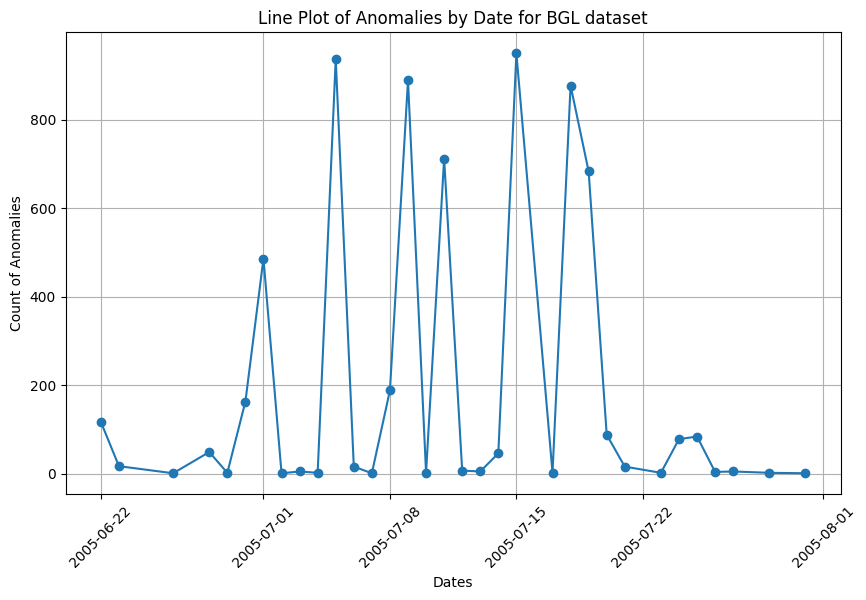

In [33]:

# Convert to pandas DataFrame for easier plotting
anomaly_counts_df = anomaly_counts.to_pandas()
anomaly_counts_df = anomaly_counts_df.sort_values(by=['date'])
# Plot line plot
plt.figure(figsize=(10, 6))
plt.plot(anomaly_counts_df['date'], anomaly_counts_df['count'], marker='o')
plt.xlabel('Dates')
plt.ylabel('Count of Anomalies')
plt.title('Line Plot of Anomalies by Date for BGL dataset')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [34]:
anomaly_counts_df

,date,count
8,2005-06-22,117
23,2005-06-23,17
25,2005-06-26,1
12,2005-06-28,49
16,2005-06-29,2
10,2005-06-30,163
2,2005-07-01,486
3,2005-07-02,1
7,2005-07-03,5
22,2005-07-04,2


In [36]:
dates = df_sample["date"].unique().to_list()
dates_normalized_anomalies = {}
for d in dates:
    df_sample = df_sample.filter(df_sample["anomaly"])
    anomaly_counts_ = df_sample.filter(df_sample["date"] == d).group_by("e_message_normalized").count()
    anomaly_counts_df_ = anomaly_counts_.to_pandas()
    anomaly_counts_df_ = anomaly_counts_df_.sort_values(by=['count'], ascending=False)
    dates_normalized_anomalies[d] = anomaly_counts_df_.to_dict()
# Group by date and df anomalies


# get unique number of unique anomalies per date from dates_normalized_anomalies
dates_normalized_anomalies_count = {}
for date, anomalies in dates_normalized_anomalies.items():
    dates_normalized_anomalies_count[date] = len(anomalies["e_message_normalized"])




dates_normalized_anomalies_count

# plot dot line plot


# Convert to pandas DataFrame for easier plotting
# anomaly_counts_df = anomaly_counts.to_pandas()
# anomaly_counts_df = anomaly_counts_df.sort_values(by=['date'])
# # Plot line plot
# plt.figure(figsize=(10, 6))
# plt.plot(anomaly_counts_df['date'], anomaly_counts_df['count'], marker='o')
# plt.xlabel('Dates')
# plt.ylabel('Count of Anomalies')
# plt.title('Line Plot of Anomalies by Date for BGL dataset')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_38951/3387917752.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  anomaly_counts_ = df_sample.filter(df_sample["date"] == d).group_by("e_message_normalized").count()
/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_38951/3387917752.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  anomaly_counts_ = df_sample.filter(df_sample["date"] == d).group_by("e_message_normalized").count()
/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_38951/3387917752.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  anomaly_counts_ = df_sample.filter(df_sample["date"] == d).group_by("e_message_normalized").count()
/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_38951/3387917752.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  anomaly_counts_ = df_sample.filter(df_sa

{datetime.date(2005, 6, 22): 1,
 datetime.date(2005, 6, 23): 3,
 datetime.date(2005, 6, 24): 0,
 datetime.date(2005, 6, 25): 0,
 datetime.date(2005, 6, 26): 1,
 datetime.date(2005, 6, 27): 0,
 datetime.date(2005, 6, 28): 4,
 datetime.date(2005, 6, 29): 2,
 datetime.date(2005, 6, 30): 2,
 datetime.date(2005, 7, 1): 6,
 datetime.date(2005, 7, 2): 1,
 datetime.date(2005, 7, 3): 2,
 datetime.date(2005, 7, 4): 2,
 datetime.date(2005, 7, 5): 2,
 datetime.date(2005, 7, 6): 16,
 datetime.date(2005, 7, 7): 1,
 datetime.date(2005, 7, 8): 22,
 datetime.date(2005, 7, 9): 7,
 datetime.date(2005, 7, 10): 2,
 datetime.date(2005, 7, 11): 23,
 datetime.date(2005, 7, 12): 4,
 datetime.date(2005, 7, 13): 3,
 datetime.date(2005, 7, 14): 2,
 datetime.date(2005, 7, 15): 6,
 datetime.date(2005, 7, 16): 0,
 datetime.date(2005, 7, 17): 2,
 datetime.date(2005, 7, 18): 8,
 datetime.date(2005, 7, 19): 10,
 datetime.date(2005, 7, 20): 5,
 datetime.date(2005, 7, 21): 16,
 datetime.date(2005, 7, 22): 0,
 datetime.da

In [ ]:
data  =dates_normalized_anomalies_count

{datetime.date(2005, 6, 22): 1,
 datetime.date(2005, 6, 23): 3,
 datetime.date(2005, 6, 24): 0,
 datetime.date(2005, 6, 25): 0,
 datetime.date(2005, 6, 26): 1,
 datetime.date(2005, 6, 27): 0,
 datetime.date(2005, 6, 28): 4,
 datetime.date(2005, 6, 29): 2,
 datetime.date(2005, 6, 30): 2,
 datetime.date(2005, 7, 1): 6,
 datetime.date(2005, 7, 2): 1,
 datetime.date(2005, 7, 3): 2,
 datetime.date(2005, 7, 4): 2,
 datetime.date(2005, 7, 5): 2,
 datetime.date(2005, 7, 6): 16,
 datetime.date(2005, 7, 7): 1,
 datetime.date(2005, 7, 8): 22,
 datetime.date(2005, 7, 9): 7,
 datetime.date(2005, 7, 10): 2,
 datetime.date(2005, 7, 11): 23,
 datetime.date(2005, 7, 12): 4,
 datetime.date(2005, 7, 13): 3,
 datetime.date(2005, 7, 14): 2,
 datetime.date(2005, 7, 15): 6,
 datetime.date(2005, 7, 16): 0,
 datetime.date(2005, 7, 17): 2,
 datetime.date(2005, 7, 18): 8,
 datetime.date(2005, 7, 19): 10,
 datetime.date(2005, 7, 20): 5,
 datetime.date(2005, 7, 21): 16,
 datetime.date(2005, 7, 22): 0,
 datetime.da

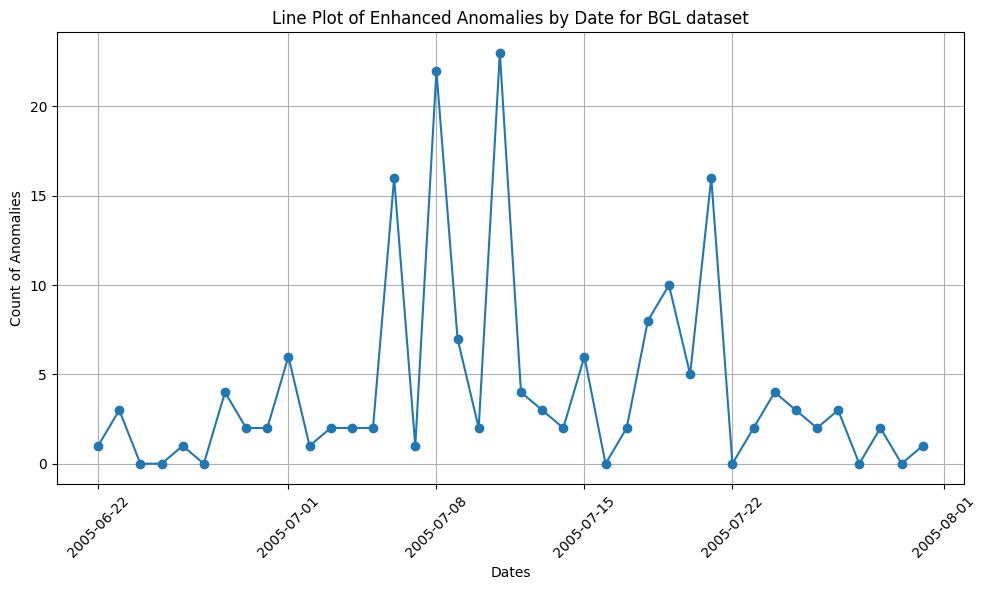

In [40]:
data = dates_normalized_anomalies_count
import pandas as pd 



df = pd.DataFrame(list(data.items()), columns=['date', 'count'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['count'], marker='o')
plt.xlabel('Dates')
plt.ylabel('Count of Anomalies')
plt.title('Line Plot of Enhanced Anomalies by Date for BGL dataset')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Added to prevent date labels from being cut off
plt.show()

In [ ]:
unique_messages = df_reduced.filter(df_reduced["anomaly"] & (df_reduced["date"] == "2005.11.29")).group_by("e_message_normalized").count()
unique_messages

/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_65454/2136758854.py:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  unique_messages = df_reduced.filter(df_reduced["anomaly"] & (df_reduced["date"] == "2005.11.29")).group_by("e_message_normalized").count()


e_message_normalized,count
str,u32
"""DDR machine check register: <H…",1
"""machine check interrupt""",1
"""MidplaneSwitchController::clea…",2
"""idoproxy communication failure…",1
"""ciodb exited abnormally due to…",1
"""rts panic! - stopping executio…",2
"""ciod: Error reading message pr…",1217
"""machine check interrupt (bit=<…",1


In [ ]:
unique_messages = df_reduced.filter(df_reduced["anomaly"] & (df_reduced["date"] == "2005.06.04")).group_by("e_message_normalized").count()
unique_messages

/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_65454/3847285688.py:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  unique_messages = df_reduced.filter(df_reduced["anomaly"] & (df_reduced["date"] == "2005.06.04")).group_by("e_message_normalized").count()


e_message_normalized,count
str,u32
"""ciod: failed to read message p…",1838


In [ ]:
def get_date_message_counts(df):
    grouped = df.filter(df["anomaly"]).group_by(
        ["date", "e_message_normalized"]
    ).agg(
        pl.count().alias("count")
    )
    
    result = {}
    for row in grouped.iter_rows(named=True):
        date = row['date']
        message = row['e_message_normalized']
        count = row['count']
        
        if date not in result:
            result[date] = {}
            
        result[date][message] = count
    
    return result

date_message_dict = get_date_message_counts(df_reduced)
save_dict_to_json(date_message_dict, "date_message_dict.json")

/var/folders/tm/fb4f8v2142z_9s8x18s5_tbc0000gn/T/ipykernel_65454/1935004966.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("count")


# Context Selection

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import polars as pl
import pandas as pd
from functools import cached_property




# config = load_yaml_config('context_selection/config.yaml')
EMBEDDER_MODEL = "sentence-transformers/all-MiniLM-L6-v2"


from sentence_transformers import SentenceTransformer
import numpy as np
from typing import Union, List
import polars as pl

# from utils.helpers import singleton

# @singleton
class Embedder:
    def __init__(self, model_name: str):
        self.model_name = model_name
        self.model = SentenceTransformer(model_name, trust_remote_code = True)

    def embed(self, text: Union[str, List[str], pl.Series]) -> np.ndarray:
        if isinstance(text, pl.Series):
            text = text.to_list()
        elif isinstance(text, str):
            text = [text]
        return self.model.encode(text)  



class ContextSelector:
    def __init__(self, selection_strategy: str, df_path: str, column_name: str, top_k_far: int, top_k_near: int, **kwargs):
        """
        Initialize the context selector with a selection strategy.
        """
        self.selection_strategy = selection_strategy # Can be "scores", "semantic", "lexical", "hybrid"
        self.df_path = df_path
        self.column_name = column_name
        self.top_k_far = top_k_far
        self.top_k_near = top_k_near
        self.line_number = kwargs.get('line_number', None)
        self.drop_duplicates = kwargs.get('drop_duplicates', False)
        self.limit_date = kwargs.get('limit_date', False)
        if self.line_number is not None:
            self.line_number = int(self.line_number)
        self.log_line = kwargs.get('log_line', None)
        self.embedder_model = kwargs.get('embedder_model', EMBEDDER_MODEL)
        self.embedder = Embedder(self.embedder_model)
        self.line_index = None


    @cached_property
    def context_df(self) -> pd.DataFrame:
        """
        Load the context dataframes from the file path.
        """
        df = pd.read_parquet(self.df_path)
        
        if self.limit_date:
            # get the date from the line_number
            date = df.loc[df['row_nr'] == self.line_number, 'date'].values[0]
            df = df[df['date'] == date]
        df["context_ids"] = None
        if 'row_nr' in df.columns:
            return df.sort_values(by='row_nr')
        else:
            return df

    def get_line_index(self):
        if not self.line_number:
            raise ValueError("Line number is not provided")
        else:
            # Reset the index first, then apply the filter
            reset_df = self.context_df.reset_index()
            line_idx = reset_df.loc[
                reset_df['row_nr'] == int(self.line_number), 'index'
            ].values[0]
            return line_idx

        
    def remove_duplicates(self) -> pd.DataFrame:
        self.line_index = self.get_line_index()
        duplicates = self.context_df.duplicated(subset=self.column_name)
        # Ensure the specific index is retained
        df_cleaned = self.context_df.loc[
            (~duplicates) | (self.context_df.index == self.line_index)
        ]
        # reset line indices
        df_cleaned.reset_index(drop=True, inplace=True)
        # recomputing the line index
        self.line_index = self.get_line_index()    
        return df_cleaned
        
    
    def get_near_context(self) -> pd.DataFrame:
        """
        return the top_k_near before and after the log_line 
        """
        if self.drop_duplicates:
            self.context_df = self.remove_duplicates()   
        
        # Get indices for rows before and after
        start_idx = max(0, self.line_index - self.top_k_near//2)
        end_idx = min(len(self.context_df) - 1, self.line_index + self.top_k_near//2)
        print(start_idx, end_idx)
        print("self.line_index is ", self.line_index)
        # Add the line_index to the context column of rows from start idex to line_index and to end_index
        self.context_df.loc[start_idx:self.line_index, 'context_ids'] = self.line_number
        self.context_df.loc[self.line_index:end_idx, 'context_ids'] = self.line_number
        return self.context_df
        
    
    def get_far_context(self) -> pd.DataFrame:
        """
        return the top_k_far before the log_line 
        """
        # select only rows before the log_line
        reduced_df = self.context_df[self.context_df['row_nr'] < self.line_number]
        reduced_df = reduced_df[reduced_df[self.column_name].notnull()]
        if not self.log_line:
            self.log_line = self.context_df[self.context_df['row_nr'] == int(self.line_number)]
            self.log_line = self.log_line[self.column_name].values[0]
        similarity_matrix = self.semantic_matrix(reduced_df)
        top_k_far = similarity_matrix.nlargest(self.top_k_far, 'similarity')
        # locate these lines  in context_df then assign context_ids of to the line_number
        self.context_df.loc[top_k_far.index, 'context_ids'] = self.line_number
        return top_k_far


    def lexical_matrix(self) -> pd.Series:
        """
        Select the context for the log line based on the lexical similarity between the log line and the context.
        """
        # Create a CountVectorizer to convert text to numerical features
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(self.context_df[self.column_name])
        log_line_vector = vectorizer.transform([self.log_line])
        cosine_similarities = cosine_similarity(log_line_vector, X)
        return self.context_df.iloc[cosine_similarities.argmax()]

    def semantic_matrix(self, reduced_df) -> pd.DataFrame:
        """
        Select the context for the log line based on the semantic similarity between the log line and the context.
        """
        context_df_embeddings = self.embedder.embed(reduced_df[self.column_name].values)
        
        log_line_embedding = self.embedder.embed(self.log_line)
        cosine_similarities = cosine_similarity(log_line_embedding, context_df_embeddings)
        
        similarity_df = reduced_df.copy()
        similarity_df['similarity'] = cosine_similarities[0]
        
        return similarity_df


    def hybrid_matrix(self) -> str:
        """
        Select the context for the log line based on the hybrid selection strategy.
        """
        pass

    def select_context(self) -> str:
        """
        Select the context for the log line based on the selection strategy.
        """
        near_context = self.get_near_context()        
        if self.selection_strategy == "semantic":
            self.get_far_context()
        
        return self.context_df




In [34]:
# from context_selection.context_selectors import ContextSelector


context_selector = ContextSelector(
    selection_strategy="semantic",
    df_path="data/sample/filtered_data_one_month.parquet",
    line_number="14737",
    top_k_far=10,
    top_k_near=10,
    column_name="e_message_normalized",
    drop_duplicates=True,
    limit_date=True
)

In [35]:
context_selector.context_df

,row_nr,label,timestamp,date,node,time,noderepeat,type,component,level,...,e_event_drain_id,e_event_tip_id,e_event_pliplom_id,e_event_iplom_id,e_event_brain_id,e_chars_len,e_lines_len,e_event_id_len,pred_ano_proba,context_ids
749802,14733,-,1117869001,2005-06-04,R33-M1-L0-U22-C,2005-06-04-00.10.01.045684,R33-M1-L0-U22-C,RAS,LINKCARD,INFO,...,e2,e266,e34e1,a3eac41a,E25,72,0,1,0.803897,None
955309,14734,-,1117869001,2005-06-04,R27-M1-L3-U18-C,2005-06-04-00.10.01.050649,R27-M1-L3-U18-C,RAS,LINKCARD,INFO,...,e2,e266,e34e1,a3eac41a,E25,72,0,1,0.803897,None
182684,14735,-,1117869871,2005-06-04,R23-M0-N4-I:J18-U11,2005-06-04-00.24.31.560279,R23-M0-N4-I:J18-U11,RAS,APP,FATAL,...,e16,e290,e10e2e2,cd424269,E125,91,0,1,0.818099,None
686461,14737,APPREAD,1117869872,2005-06-04,R23-M1-N8-I:J18-U11,2005-06-04-00.24.32.398284,R23-M1-N8-I:J18-U11,RAS,APP,FATAL,...,e17,e39,e26e3,2f7bdbb2,E112,94,0,1,0.817068,None
661821,14738,APPREAD,1117869872,2005-06-04,R04-M1-N4-I:J18-U11,2005-06-04-00.24.32.432192,R04-M1-N4-I:J18-U11,RAS,APP,FATAL,...,e17,e39,e26e3,2f7bdbb2,E112,94,0,1,0.817068,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116051,17461,-,1117954237,2005-06-04,R21-M1-N8-I:J18-U11,2005-06-04-23.50.37.875334,R21-M1-N8-I:J18-U11,RAS,APP,FATAL,...,e10,e18,e38e1e2,f301e699,E155,124,0,1,0.822558,None
912021,17462,-,1117954237,2005-06-04,R21-M1-N8-I:J18-U01,2005-06-04-23.50.37.896480,R21-M1-N8-I:J18-U01,RAS,APP,FATAL,...,e10,e18,e38e1e2,f301e699,E155,124,0,1,0.822558,None
734585,17463,-,1117954237,2005-06-04,R24-M0-NC-I:J18-U11,2005-06-04-23.50.37.917365,R24-M0-NC-I:J18-U11,RAS,APP,FATAL,...,e10,e18,e38e1e2,f301e699,E155,124,0,1,0.822558,None
289277,17464,-,1117954237,2005-06-04,R24-M0-NC-I:J18-U01,2005-06-04-23.50.37.944342,R24-M0-NC-I:J18-U01,RAS,APP,FATAL,...,e10,e18,e38e1e2,f301e699,E155,124,0,1,0.822558,None


In [36]:
context_selector.get_near_context()
# TODO first save index line then delete duplicates

686456 13
self.line_index is  686461


,row_nr,label,timestamp,date,node,time,noderepeat,type,component,level,...,e_event_drain_id,e_event_tip_id,e_event_pliplom_id,e_event_iplom_id,e_event_brain_id,e_chars_len,e_lines_len,e_event_id_len,pred_ano_proba,context_ids
0,14733,-,1117869001,2005-06-04,R33-M1-L0-U22-C,2005-06-04-00.10.01.045684,R33-M1-L0-U22-C,RAS,LINKCARD,INFO,...,e2,e266,e34e1,a3eac41a,E25,72,0,1,0.803897,None
1,14734,-,1117869001,2005-06-04,R27-M1-L3-U18-C,2005-06-04-00.10.01.050649,R27-M1-L3-U18-C,RAS,LINKCARD,INFO,...,e2,e266,e34e1,a3eac41a,E25,72,0,1,0.803897,None
2,14735,-,1117869871,2005-06-04,R23-M0-N4-I:J18-U11,2005-06-04-00.24.31.560279,R23-M0-N4-I:J18-U11,RAS,APP,FATAL,...,e16,e290,e10e2e2,cd424269,E125,91,0,1,0.818099,None
3,14737,APPREAD,1117869872,2005-06-04,R23-M1-N8-I:J18-U11,2005-06-04-00.24.32.398284,R23-M1-N8-I:J18-U11,RAS,APP,FATAL,...,e17,e39,e26e3,2f7bdbb2,E112,94,0,1,0.817068,None
4,15759,-,1117885510,2005-06-04,R23-M1-N8-I:J18-U01,2005-06-04-04.45.10.488917,R23-M1-N8-I:J18-U01,RAS,APP,FATAL,...,e18,e290,e10e2e2,cd424269,E125,66,0,1,0.818099,None
5,16271,-,1117885982,2005-06-04,R16-M1-N2-C:J17-U01,2005-06-04-04.53.02.490873,R16-M1-N2-C:J17-U01,RAS,KERNEL,INFO,...,e4,e44,e26e1,4f583ec3,E109,65,0,1,0.832651,None
6,16273,-,1117885982,2005-06-04,R16-M1-N2-C:J17-U01,2005-06-04-04.53.02.814041,R16-M1-N2-C:J17-U01,RAS,KERNEL,INFO,...,e6,e3,e22e1,2440e3b4,E137,34,0,1,0.818869,None
7,16274,-,1117885982,2005-06-04,R01-M1-N9-C:J15-U11,2005-06-04-04.53.02.847675,R01-M1-N9-C:J15-U11,RAS,KERNEL,INFO,...,e5,e161,e10e1,03753676,E124,59,0,1,0.823603,None
8,16277,-,1117885982,2005-06-04,R26-M0-N0-C:J14-U01,2005-06-04-04.53.02.948833,R26-M0-N0-C:J14-U01,RAS,KERNEL,INFO,...,e5,e161,e10e1,03753676,E124,57,0,1,0.823618,None
9,16278,-,1117885983,2005-06-04,R16-M1-N2-C:J17-U01,2005-06-04-04.53.03.219090,R16-M1-N2-C:J17-U01,RAS,KERNEL,INFO,...,e7,e146,e34e2,a5a309dd,E26,46,0,1,0.824705,None


In [37]:
context_selector.select_context()

0 8
self.line_index is  3


,row_nr,label,timestamp,date,node,time,noderepeat,type,component,level,...,e_event_drain_id,e_event_tip_id,e_event_pliplom_id,e_event_iplom_id,e_event_brain_id,e_chars_len,e_lines_len,e_event_id_len,pred_ano_proba,context_ids
0,14733,-,1117869001,2005-06-04,R33-M1-L0-U22-C,2005-06-04-00.10.01.045684,R33-M1-L0-U22-C,RAS,LINKCARD,INFO,...,e2,e266,e34e1,a3eac41a,E25,72,0,1,0.803897,14737
1,14734,-,1117869001,2005-06-04,R27-M1-L3-U18-C,2005-06-04-00.10.01.050649,R27-M1-L3-U18-C,RAS,LINKCARD,INFO,...,e2,e266,e34e1,a3eac41a,E25,72,0,1,0.803897,14737
2,14735,-,1117869871,2005-06-04,R23-M0-N4-I:J18-U11,2005-06-04-00.24.31.560279,R23-M0-N4-I:J18-U11,RAS,APP,FATAL,...,e16,e290,e10e2e2,cd424269,E125,91,0,1,0.818099,14737
3,14737,APPREAD,1117869872,2005-06-04,R23-M1-N8-I:J18-U11,2005-06-04-00.24.32.398284,R23-M1-N8-I:J18-U11,RAS,APP,FATAL,...,e17,e39,e26e3,2f7bdbb2,E112,94,0,1,0.817068,14737
4,15759,-,1117885510,2005-06-04,R23-M1-N8-I:J18-U01,2005-06-04-04.45.10.488917,R23-M1-N8-I:J18-U01,RAS,APP,FATAL,...,e18,e290,e10e2e2,cd424269,E125,66,0,1,0.818099,14737
5,16271,-,1117885982,2005-06-04,R16-M1-N2-C:J17-U01,2005-06-04-04.53.02.490873,R16-M1-N2-C:J17-U01,RAS,KERNEL,INFO,...,e4,e44,e26e1,4f583ec3,E109,65,0,1,0.832651,14737
6,16273,-,1117885982,2005-06-04,R16-M1-N2-C:J17-U01,2005-06-04-04.53.02.814041,R16-M1-N2-C:J17-U01,RAS,KERNEL,INFO,...,e6,e3,e22e1,2440e3b4,E137,34,0,1,0.818869,14737
7,16274,-,1117885982,2005-06-04,R01-M1-N9-C:J15-U11,2005-06-04-04.53.02.847675,R01-M1-N9-C:J15-U11,RAS,KERNEL,INFO,...,e5,e161,e10e1,03753676,E124,59,0,1,0.823603,14737
8,16277,-,1117885982,2005-06-04,R26-M0-N0-C:J14-U01,2005-06-04-04.53.02.948833,R26-M0-N0-C:J14-U01,RAS,KERNEL,INFO,...,e5,e161,e10e1,03753676,E124,57,0,1,0.823618,14737
9,16278,-,1117885983,2005-06-04,R16-M1-N2-C:J17-U01,2005-06-04-04.53.03.219090,R16-M1-N2-C:J17-U01,RAS,KERNEL,INFO,...,e7,e146,e34e2,a5a309dd,E26,46,0,1,0.824705,None


In [38]:
context_selector.get_far_context()

,row_nr,label,timestamp,date,node,time,noderepeat,type,component,level,...,e_event_tip_id,e_event_pliplom_id,e_event_iplom_id,e_event_brain_id,e_chars_len,e_lines_len,e_event_id_len,pred_ano_proba,context_ids,similarity
2,14735,-,1117869871,2005-06-04,R23-M0-N4-I:J18-U11,2005-06-04-00.24.31.560279,R23-M0-N4-I:J18-U11,RAS,APP,FATAL,...,e290,e10e2e2,cd424269,E125,91,0,1,0.818099,14737,0.345444
0,14733,-,1117869001,2005-06-04,R33-M1-L0-U22-C,2005-06-04-00.10.01.045684,R33-M1-L0-U22-C,RAS,LINKCARD,INFO,...,e266,e34e1,a3eac41a,E25,72,0,1,0.803897,14737,0.186868
1,14734,-,1117869001,2005-06-04,R27-M1-L3-U18-C,2005-06-04-00.10.01.050649,R27-M1-L3-U18-C,RAS,LINKCARD,INFO,...,e266,e34e1,a3eac41a,E25,72,0,1,0.803897,14737,0.184909
